# Data Cleaning using Central Tendency (Mean, Median)

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading dataset from Google Drive
datafromdrive = 'https://drive.google.com/file/d/1_Tj6f1AXtKJ5Dj7SJvxGGIN6lKExaom1/view?usp=sharing'
datafromdrive = 'https://drive.google.com/uc?id=' + datafromdrive.split('/')[-2]
data = pd.read_csv(datafromdrive)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# Shape of data
data.shape

(1460, 81)

In [4]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Data Descriptive statistics
data.describe()

In [5]:
# No. of null values in each column
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

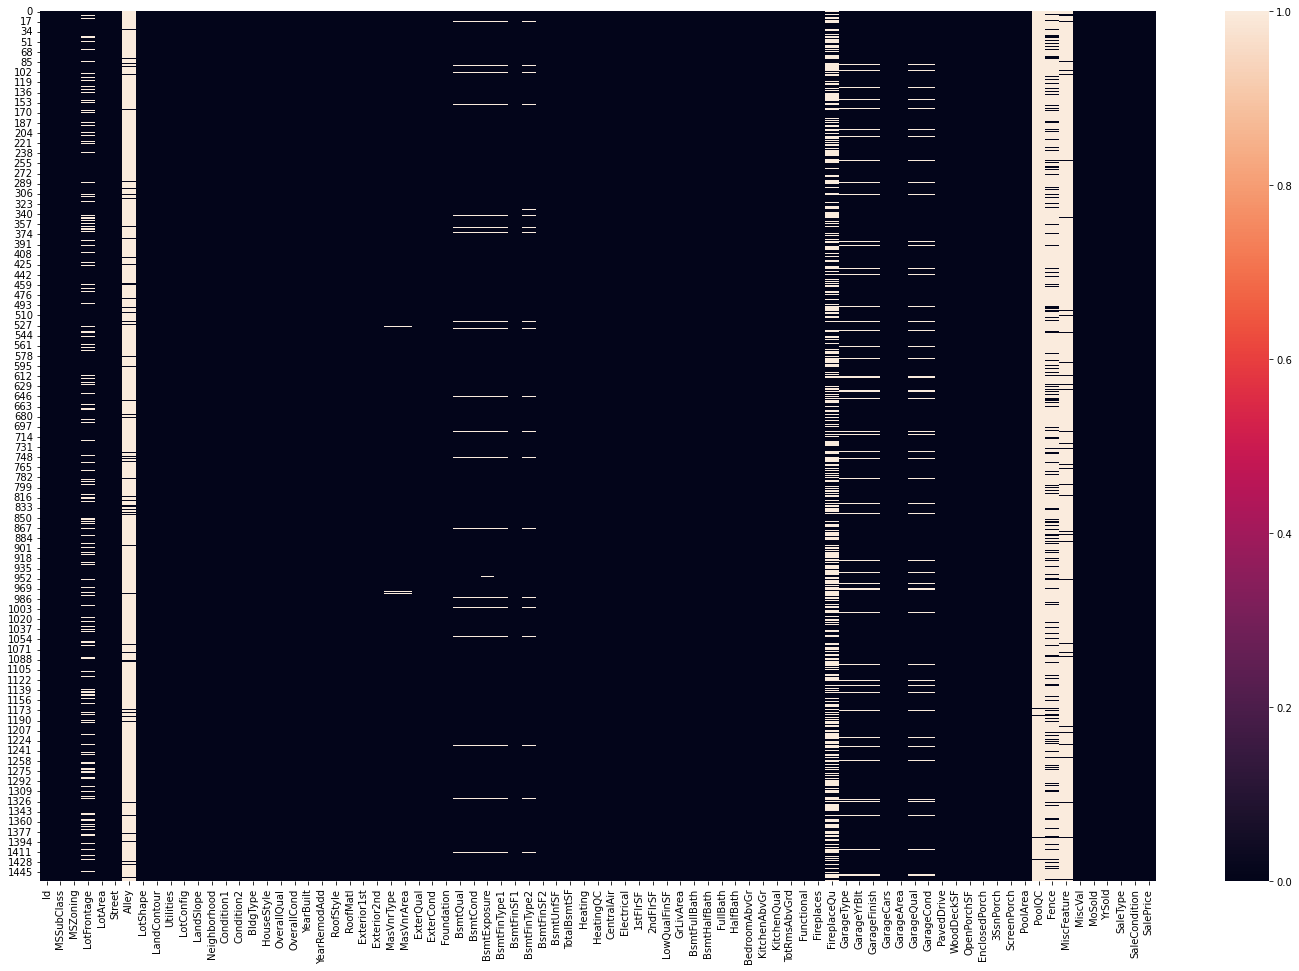

In [6]:
# Plotting Heatmap for null values
plt.figure(figsize=(25, 16))
sns.heatmap(data.isnull())
plt.show()

In [7]:
# Checking available percentage of null values
null_var = data.isnull().sum() / data.shape[0] * 100
null_var

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [8]:
# Columns having null values more than 20%
null_columns = null_var[null_var > 20].keys()
null_columns

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [9]:
# Dropping columns having null values more than 20%
droped_columns = data.drop(columns=null_columns)
droped_columns.shape

(1460, 76)

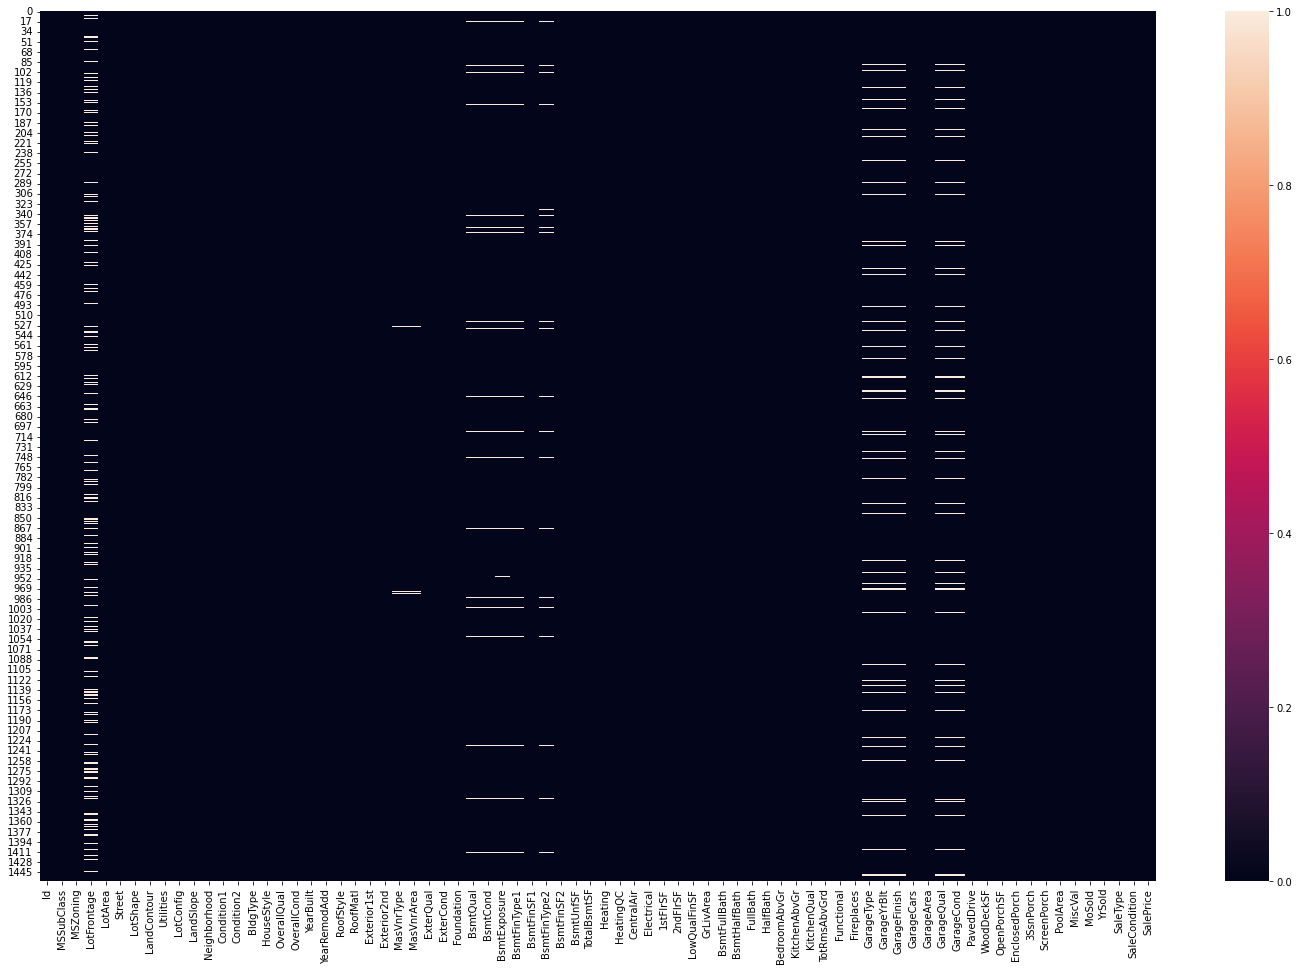

In [10]:
# Plotting Heatmap for new data after dropping columns having null values more than 20%
plt.figure(figsize=(25, 16))
sns.heatmap(droped_columns.isnull())
plt.show()

In [11]:
# Selecting Numerical columns
num_data = droped_columns.select_dtypes(include=['int', 'float'])
num_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


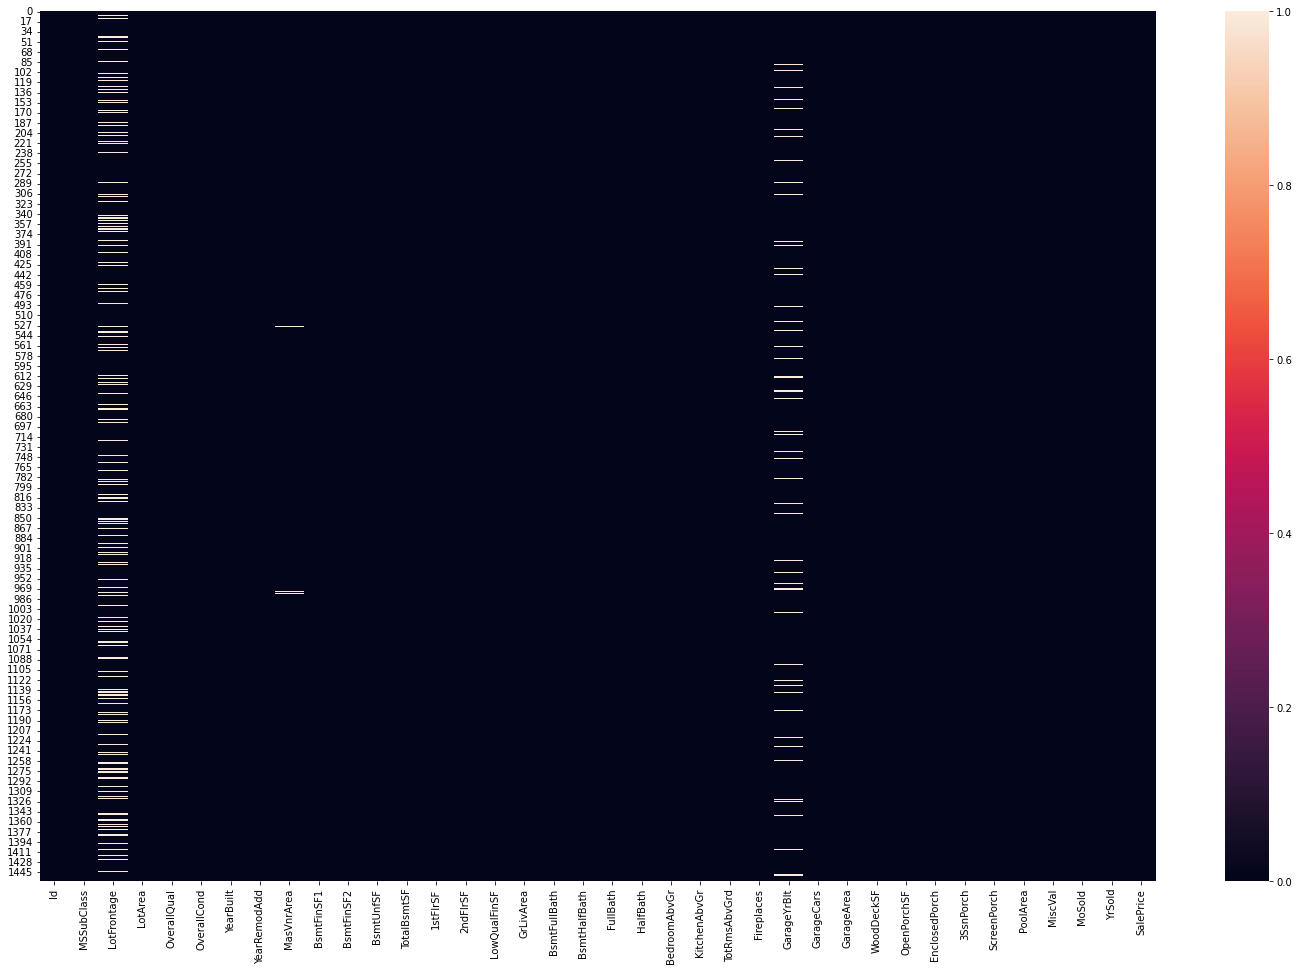

In [12]:
# Plotting Heatmap for numerical data
plt.figure(figsize=(25, 16))
sns.heatmap(num_data.isnull())
plt.show()

In [13]:
# Checking columns having null values in numerical data
null_columns = [var for var in num_data.columns if num_data[var].isnull().sum()>0]
null_columns

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

C:\Users\Rituraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rituraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rituraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

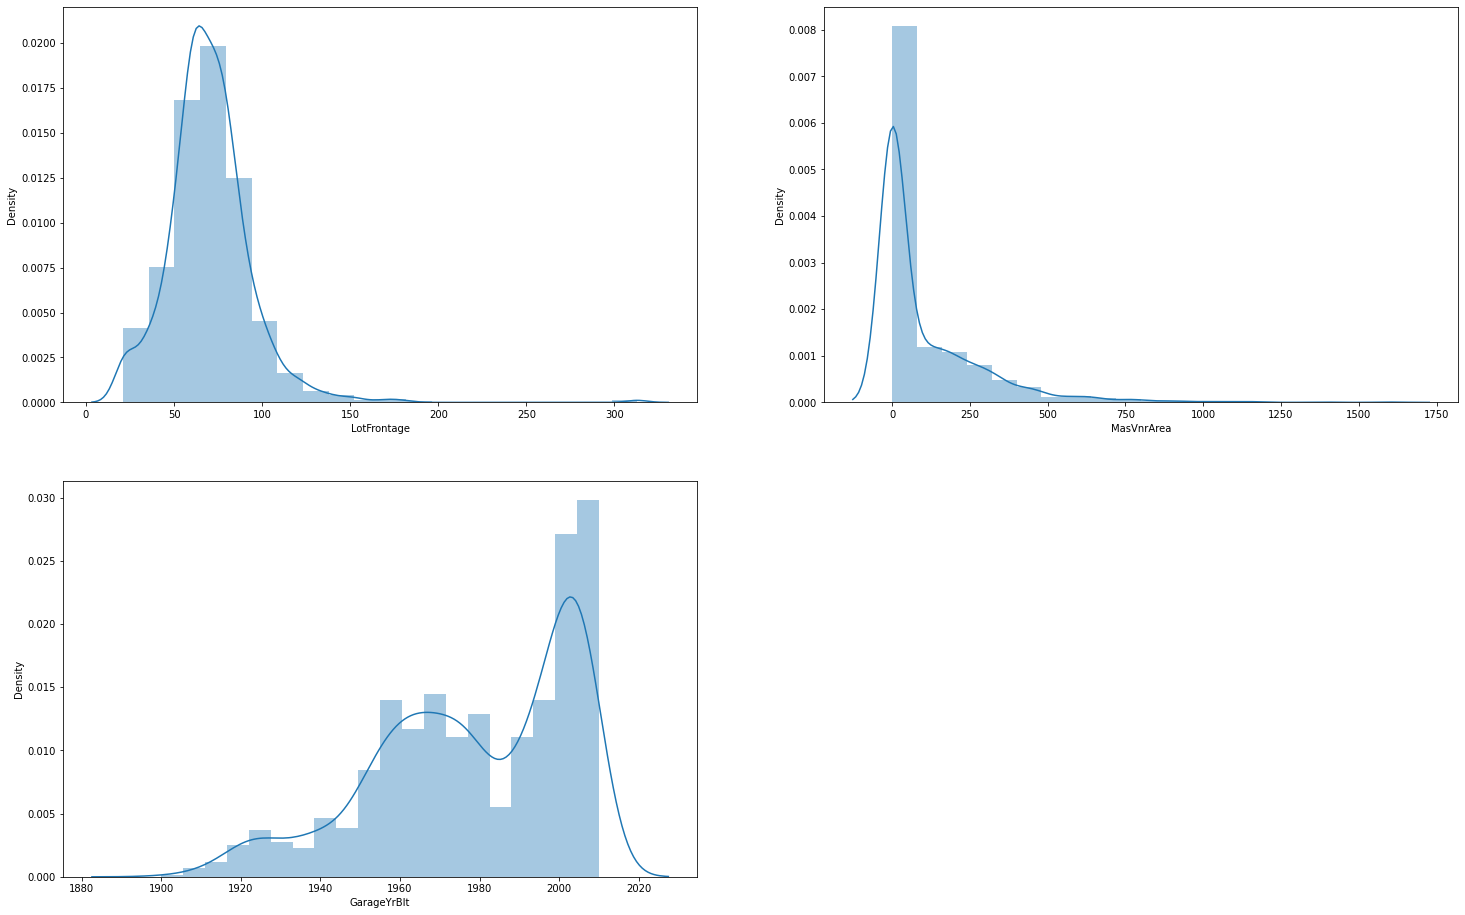

In [14]:
# Checking data distribution
plt.figure(figsize=(25,16))
for i, var in enumerate(null_columns):
    plt.subplot(2,2, i+1)
    sns.distplot(num_data[var], bins=20)
plt.show()

Normaly distributed/Symmetric distribution - Mean/Median/Module
Skewed distribution/Asymmetric distribution - Median

In [15]:
# Filling missing data with mean values
num_data_mean = num_data.fillna(num_data.mean())

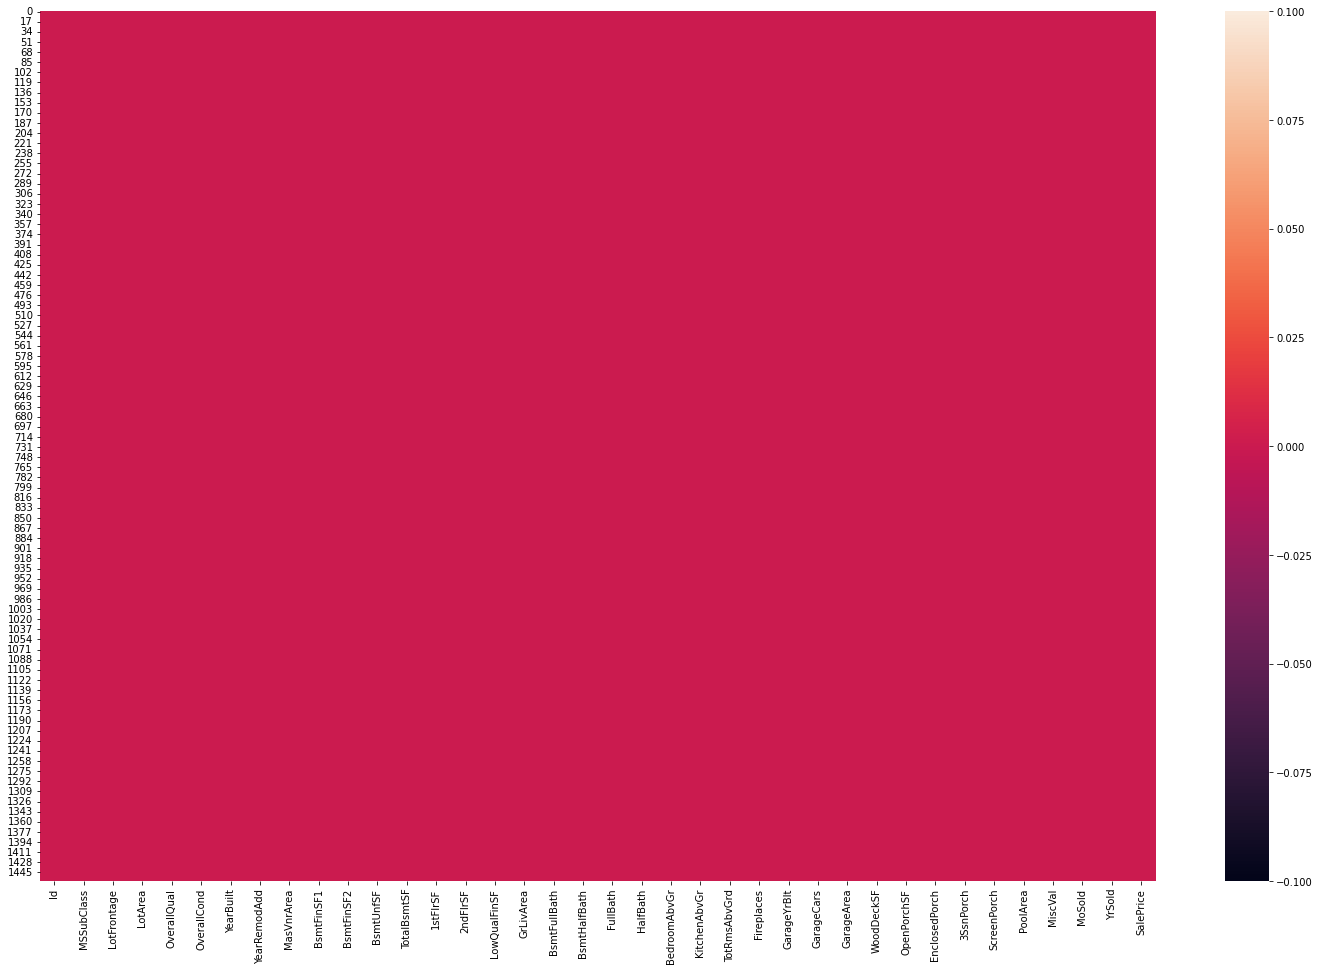

In [16]:
#plotting heatmap for cleaned data
plt.figure(figsize=(25, 16))
sns.heatmap(num_data_mean.isnull())
plt.show()

## Data Distribution of original and cleaned data

C:\Users\Rituraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rituraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rituraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

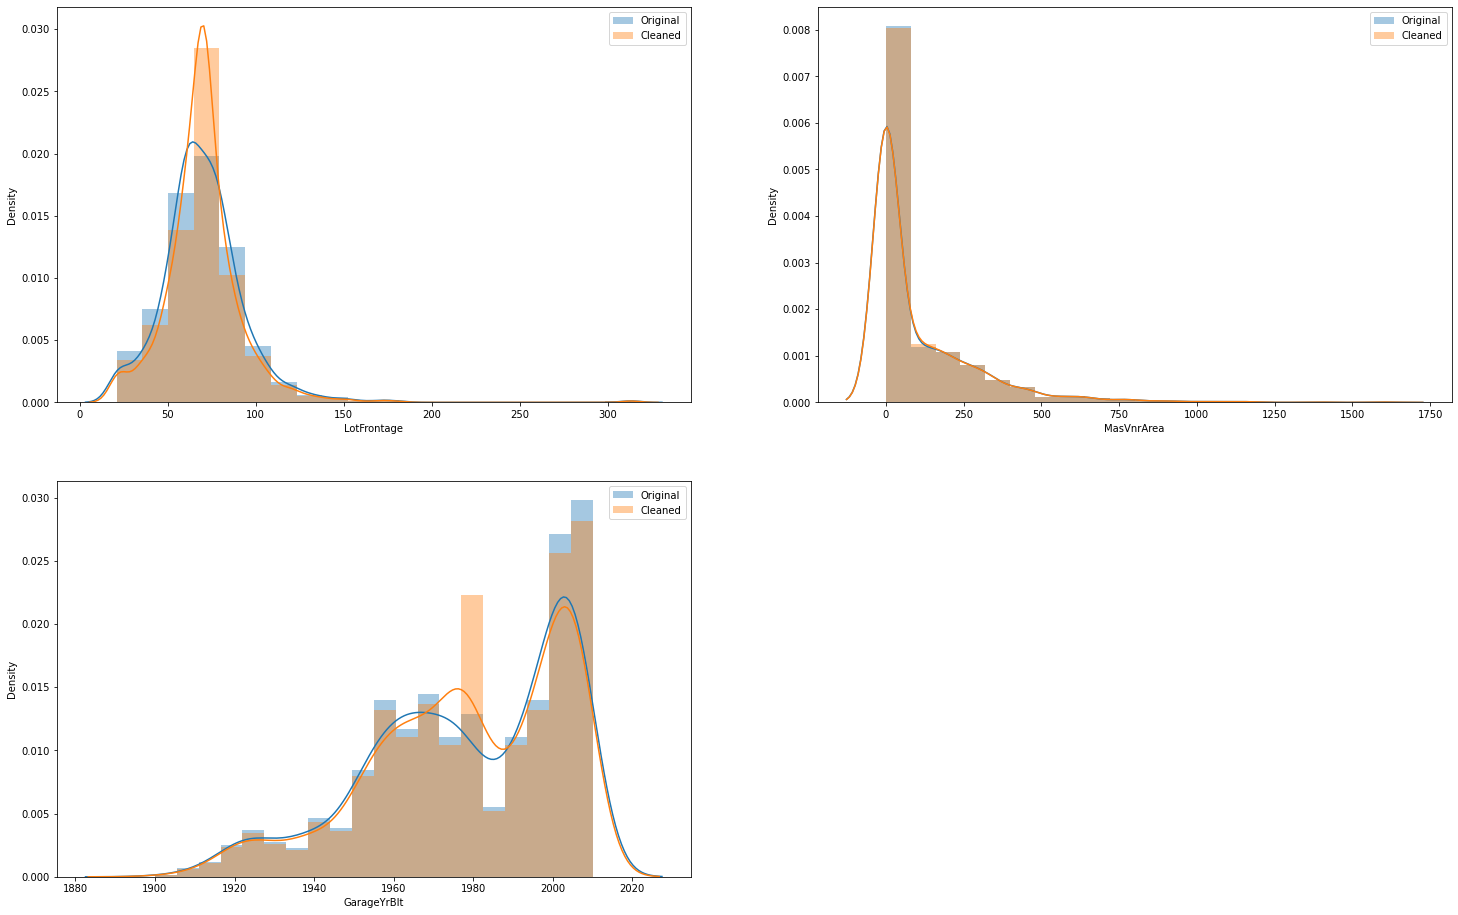

In [17]:
plt.figure(figsize=(25,16))
for i, var in enumerate(null_columns):
    plt.subplot(2,2, i+1)
    sns.distplot(num_data[var], bins=20,label='Original')
    sns.distplot(num_data_mean[var], bins=20,label='Cleaned')
    plt.legend()
plt.show()

In [18]:
# Filling missing data with median values
num_data_median = num_data.fillna(num_data.median())

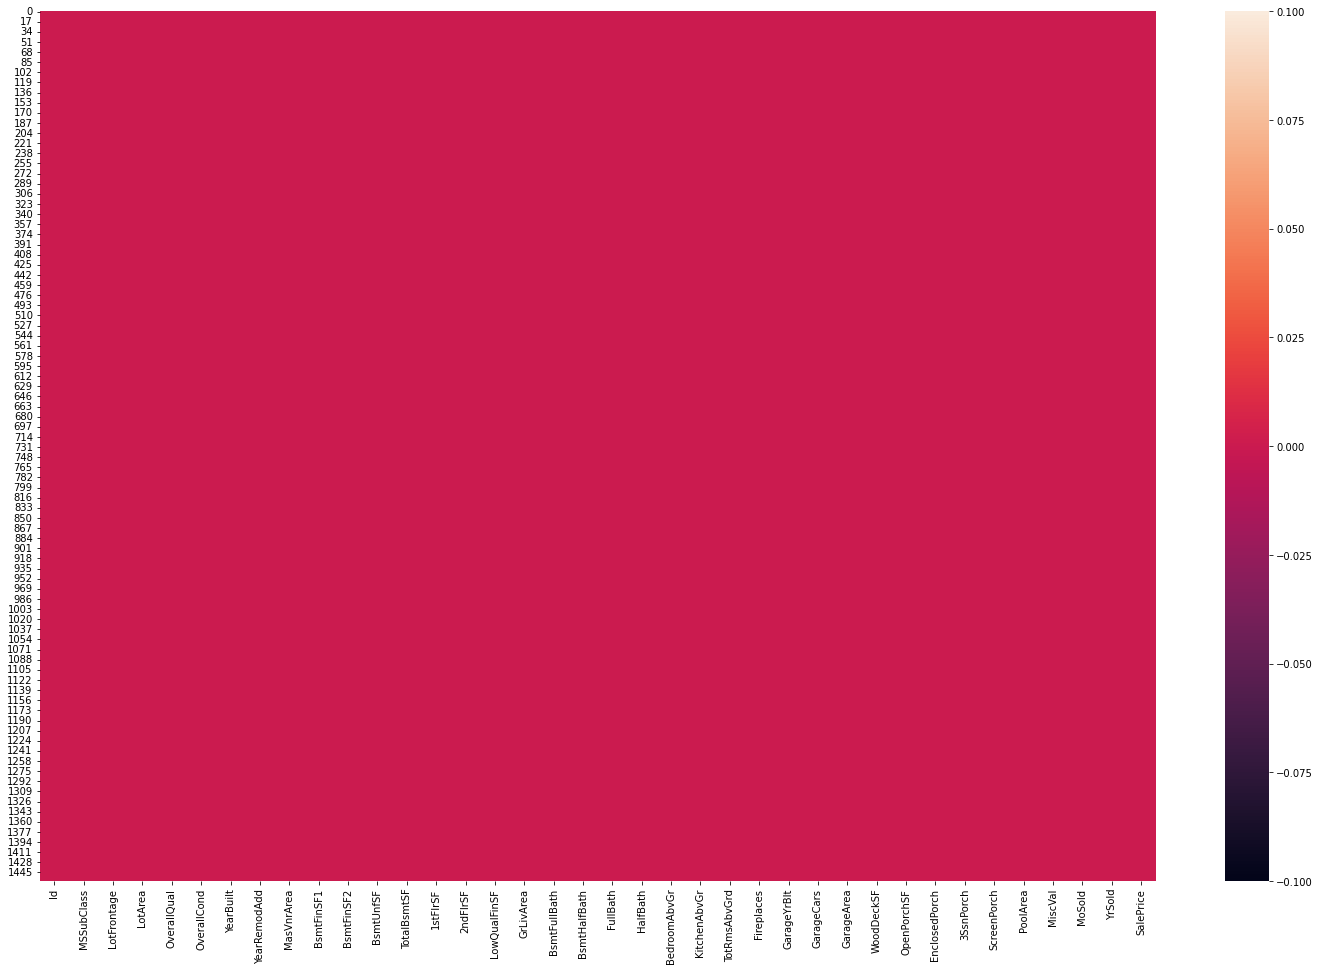

In [19]:
#plotting heatmap for cleaned data
plt.figure(figsize=(25, 16))
sns.heatmap(num_data_median.isnull())
plt.show()

## Data Distribution of original and cleaned data

C:\Users\Rituraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rituraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rituraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

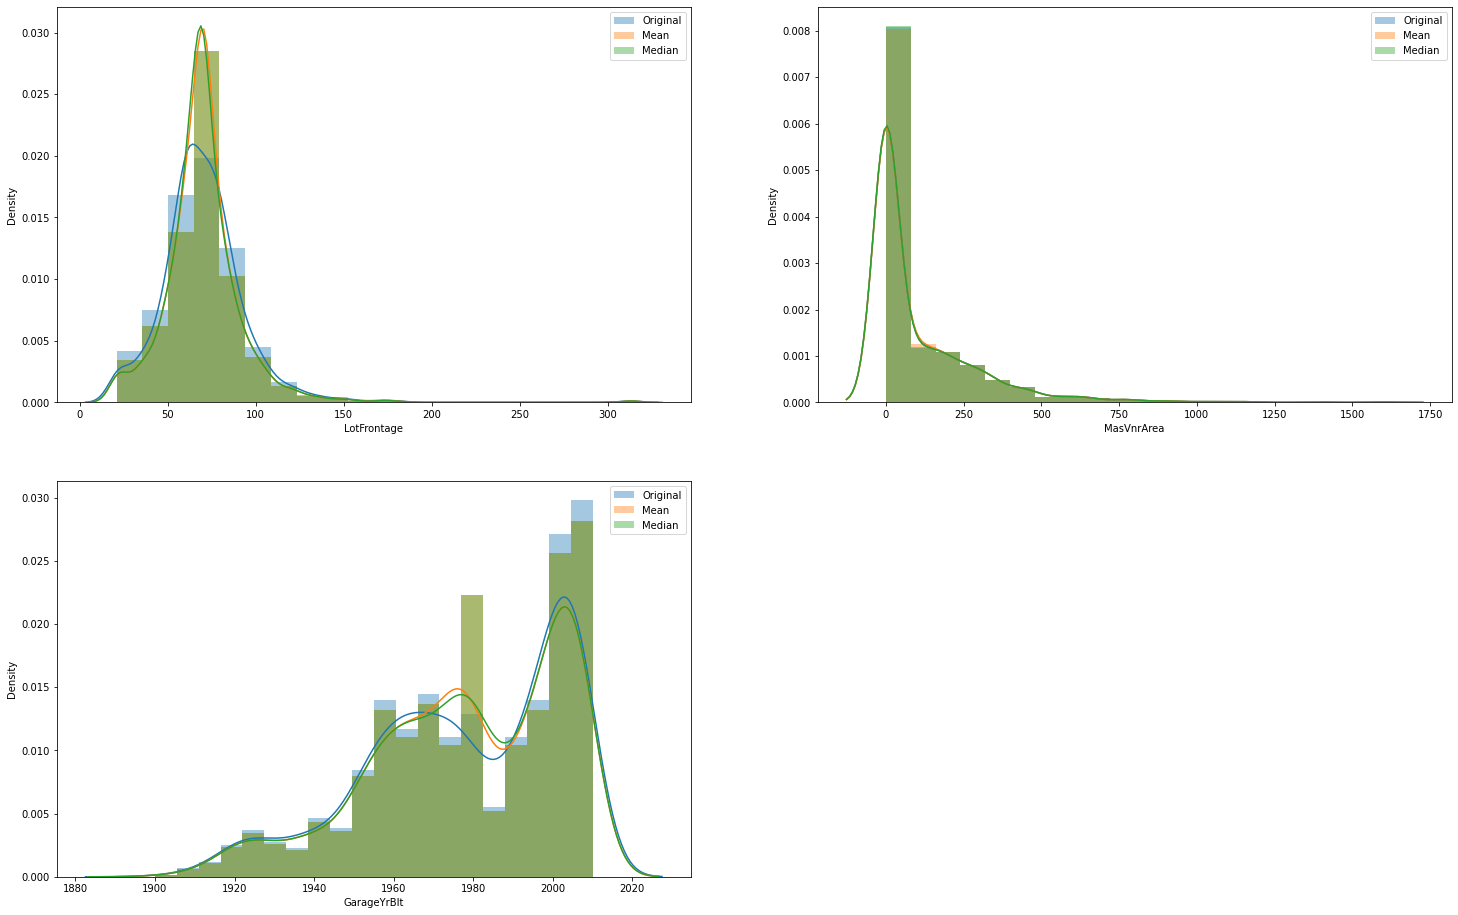

In [20]:
plt.figure(figsize=(25,16))
for i, var in enumerate(null_columns):
    plt.subplot(2,2, i+1)
    sns.distplot(num_data[var], bins=20,label='Original')
    sns.distplot(num_data_mean[var], bins=20,label='Mean')
    sns.distplot(num_data_median[var], bins=20,label='Median')
    plt.legend()
plt.show()

In [21]:
data_concat = pd.concat([num_data[null_columns],num_data_mean[null_columns],num_data_median[null_columns]], axis=1, keys=['Original','Mean','Median'])
data_concat[data_concat.isnull().any(axis=1)]

Original                               Mean                          \
     LotFrontage MasVnrArea GarageYrBlt LotFrontage MasVnrArea  GarageYrBlt   
7            NaN      240.0      1973.0   70.049958      240.0  1973.000000   
12           NaN        0.0      1962.0   70.049958        0.0  1962.000000   
14           NaN      212.0      1960.0   70.049958      212.0  1960.000000   
16           NaN      180.0      1970.0   70.049958      180.0  1970.000000   
24           NaN        0.0      1968.0   70.049958        0.0  1968.000000   
...          ...        ...         ...         ...        ...          ...   
1443         NaN        0.0      1916.0   70.049958        0.0  1916.000000   
1446         NaN      189.0      1962.0   70.049958      189.0  1962.000000   
1449        21.0        0.0         NaN   21.000000        0.0  1978.506164   
1450        60.0        0.0         NaN   60.000000        0.0  1978.506164   
1453        90.0        0.0         NaN   90.000000        0.0  1978.506164   

          Median                         
     LotFrontage MasVnrArea GarageYrBlt  
7           69.0      240.0      1973.0  
12          69.0        0.0      1962.0  
14          69.0      212.0      1960.0  
16          69.0      180.0      1970.0  
24          69.0        0.0      1968.0  
...          ...        ...         ...  
1443        69.0        0.0      1916.0  
1446        69.0      189.0      1962.0  
1449        21.0        0.0      1980.0  
1450        60.0        0.0      1980.0  
1453        90.0        0.0      1980.0  

[339 rows x 9 columns]

### Prepared by RITURAJ RAMAN